<a href="https://colab.research.google.com/github/RohanMathur17/Stock-Price-Prediction-Using-LSTMs/blob/main/Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Stock Price Prediction Using LSTMs**

### To predict the closing stock price of a company

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import math
import pandas_datareader as web

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense , LSTM

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
# Get the stock

df = pd.read_csv('new_^IXIC.csv') 

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,truth
0,2020-07-27,10421.700195,10546.440430,10399.860352,10536.269531,10536.269531,4.244570e+09,1
1,2020-07-28,10509.200195,10523.639648,10397.870117,10402.089844,10402.089844,3.894660e+09,1
2,2020-07-29,10474.700195,10567.910156,10464.000000,10542.940430,10542.940430,4.009640e+09,1
3,2020-07-30,10450.120117,10609.589844,10412.089844,10587.809570,10587.809570,4.185810e+09,1
4,2020-07-31,10741.469727,10747.799805,10557.700195,10745.269531,10745.269531,4.438730e+09,1


In [5]:
df.shape  # Getting the rows & columns 

(1090, 8)

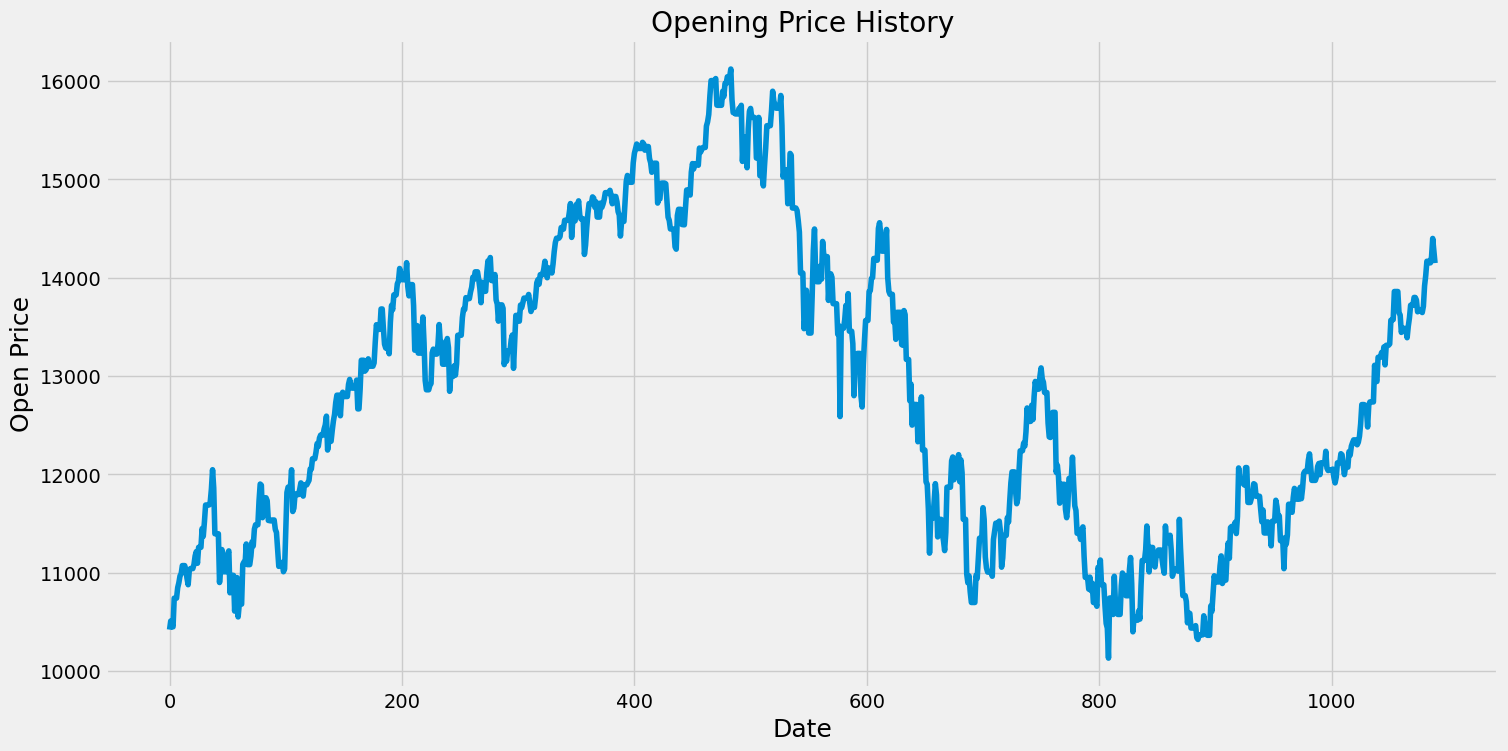

In [6]:
# Visualize the opening price history

plt.figure(figsize = (16, 8))
plt.title('Opening Price History')
plt.plot(df['Open'])

plt.xlabel('Date' , fontsize = '18')
plt.ylabel('Open Price' , fontsize = '18')

plt.show()

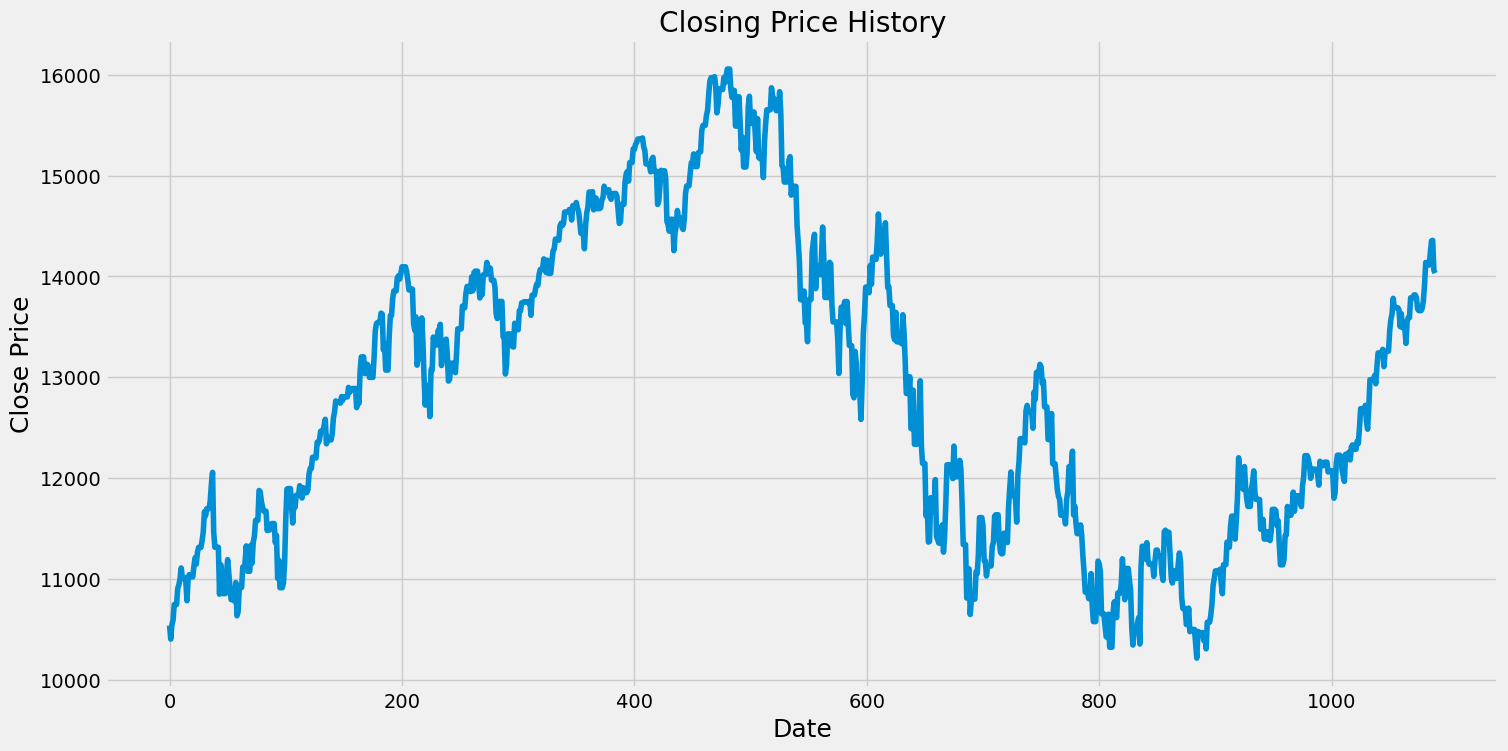

In [7]:
# Visualize the close price history

plt.figure(figsize = (16, 8))
plt.title('Closing Price History')
plt.plot(df['Close'])

plt.xlabel('Date' , fontsize = '18')
plt.ylabel('Close Price' , fontsize = '18')

plt.show()

In [8]:
# Use a dataframe having only Close column

data = df.filter(['Close'])

# Convert data into np array

dataset = data.values

# Get the number of rows to train the model on

training_data_len = math.ceil(len(dataset) * 0.7) # Specifying 70 percent as training data

In [9]:
training_data_len

763

In [10]:
# Scaling the data

scaler = MinMaxScaler(feature_range=(0, 1))
  # Scales values of dataset between 0 & 1

scaled_data = scaler.fit_transform(dataset)

In [11]:
scaled_data.shape

(1090, 1)

In [12]:
# Creating training dataset 

# Creating the scaled training dataset

train_data = scaled_data[0:training_data_len , :]

# Splitting train into x_train & y_train

x_train = []    # Training features
y_train = []    # Target variables

for i in range(30 , len(train_data)):  # 30 days 

    x_train.append(train_data[i-30:i , 0])  # 30 values from position 0 to 29
    y_train.append(train_data[i,0])         # 31st value with position 30

    if (i <= 31):

        print(x_train)
        print(y_train)
        print()

[array([0.05526543, 0.03230577, 0.0564069 , 0.06408451, 0.09102769,
       0.09102769, 0.09102769, 0.11798289, 0.12454845, 0.13434123,
       0.15310699, 0.13649382, 0.13649382, 0.13649382, 0.12920104,
       0.09745305, 0.13670938, 0.14188717, 0.13791736, 0.13791736,
       0.13791736, 0.15681329, 0.17069201, 0.15967589, 0.17995091,
       0.1879674 , 0.1879674 , 0.1879674 , 0.19958927, 0.21443317])]
[0.24841412932078666]

[array([0.05526543, 0.03230577, 0.0564069 , 0.06408451, 0.09102769,
       0.09102769, 0.09102769, 0.11798289, 0.12454845, 0.13434123,
       0.15310699, 0.13649382, 0.13649382, 0.13649382, 0.12920104,
       0.09745305, 0.13670938, 0.14188717, 0.13791736, 0.13791736,
       0.13791736, 0.15681329, 0.17069201, 0.15967589, 0.17995091,
       0.1879674 , 0.1879674 , 0.1879674 , 0.19958927, 0.21443317]), array([0.03230577, 0.0564069 , 0.06408451, 0.09102769, 0.09102769,
       0.09102769, 0.11798289, 0.12454845, 0.13434123, 0.15310699,
       0.13649382, 0.13649382, 0.

In [13]:
train_data.shape

(763, 1)

In [14]:
len(y_train)

733

In [15]:
# Convert x_train & y_train into np arrays for putting into LSTM model

x_train , y_train = np.array(x_train) , np.array(y_train)

In [16]:
y_train.shape

(733,)

In [17]:
# Reshaping the data

# LSTM needs it in such a way which is 3d , right now ours is 2d

x_train = np.reshape(x_train , (x_train.shape[0] , x_train.shape[1] , 1))
x_train.shape

(733, 30, 1)

In [30]:
# Building the LSTM models


model = Sequential()

model.add(LSTM(40 , return_sequences= True , input_shape =(x_train.shape[1],1)))
model.add(LSTM(40 , return_sequences=False))

model.add(Dense(20))
model.add(Dense(1))

In [31]:
# Compiling the model

model.compile(optimizer = 'adam' , loss = 'mean_squared_error')

In [51]:
# Training the model

model.fit(x_train , y_train , batch_size = 1, epochs = 10)

Epoch 1/10
733/733 [==============================] - 4s 6ms/step - loss: 0.0011
Epoch 2/10
733/733 [==============================] - 4s 6ms/step - loss: 0.0012
Epoch 3/10
733/733 [==============================] - 4s 6ms/step - loss: 0.0011
Epoch 4/10
733/733 [==============================] - 4s 6ms/step - loss: 0.0011
Epoch 5/10
733/733 [==============================] - 4s 6ms/step - loss: 0.0011
Epoch 6/10
733/733 [==============================] - 4s 6ms/step - loss: 0.0011
Epoch 7/10
733/733 [==============================] - 4s 6ms/step - loss: 0.0011
Epoch 8/10
733/733 [==============================] - 4s 6ms/step - loss: 0.0011
Epoch 9/10
733/733 [==============================] - 4s 6ms/step - loss: 0.0010
Epoch 10/10
733/733 [==============================] - 4s 6ms/step - loss: 0.0011


In [52]:
# Creating test data set

test_data = scaled_data[training_data_len - 30 : ,:]

# Creating x_test & y_test

x_test = []
y_test = []

y_test = dataset[training_data_len: , :]  # All values that our model will predict

for i in range(30 , len(test_data)):

    x_test.append(test_data[i-30:i , 0])
    

In [53]:
# Converting data again , to np array

x_test = np.array(x_test)

# Reshaping this data for LSTM model 

x_test = np.reshape(x_test , (x_test.shape[0] , x_test.shape[1] , 1))

In [54]:
# Get the predicted values

predictions = model.predict(x_test)

predictions = scaler.inverse_transform(predictions) # Unscaling the values from 0-1 to noraml ones that were already present

11/11 [==============================] - 0s 3ms/step


In [55]:
# Evaluation of our model

# Getting RMSE as a metric

rmse=np.sqrt(np.mean(predictions- y_test)**2)

rmse

19.842689775229402

#### **A good score**

C:\Users\Tristan\AppData\Local\Temp\ipykernel_21088\4237858295.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


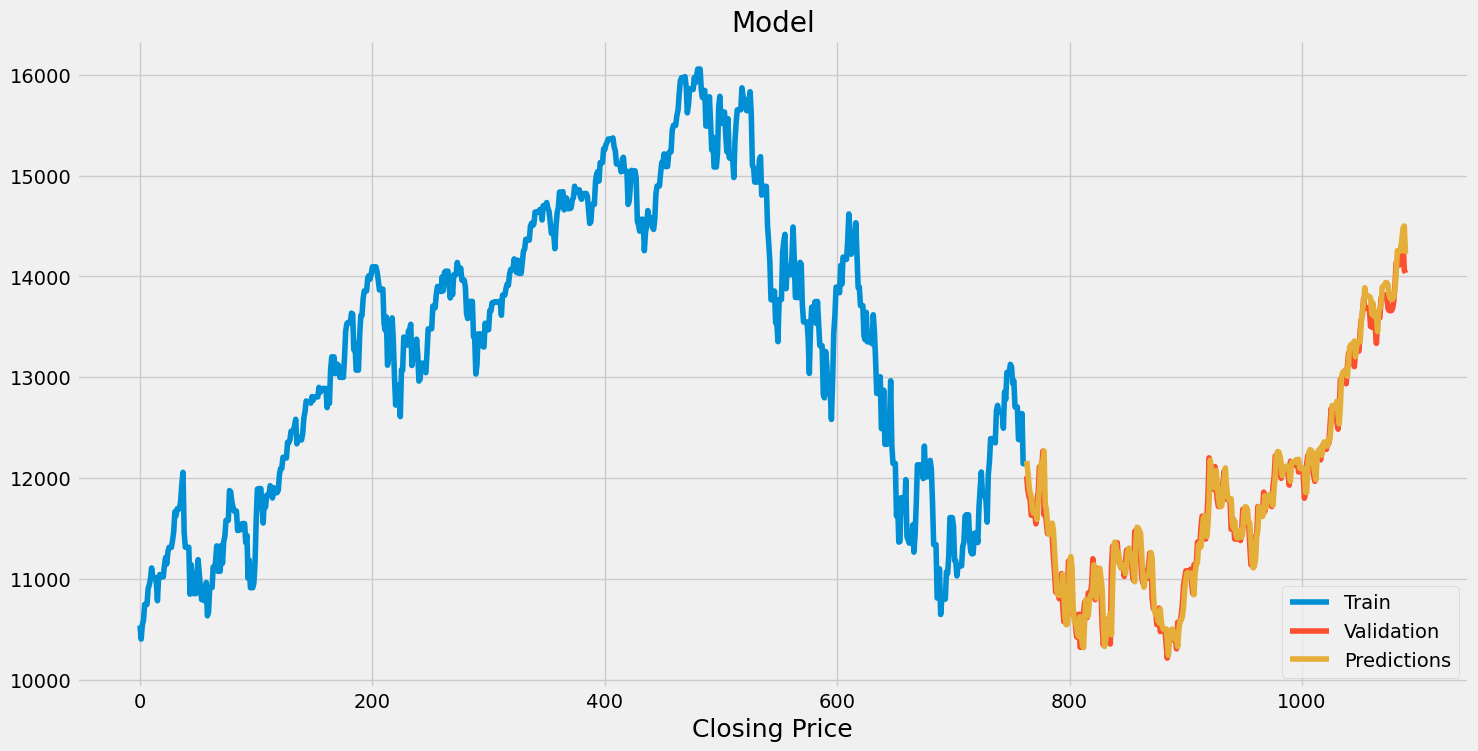

In [56]:
# Plotting the data

train = data[:training_data_len]
valid = data[training_data_len:]

valid['Predictions'] = predictions

plt.figure(figsize = (16 , 8))

plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.xlabel('Closing Price', fontsize = 18)

plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

plt.legend(['Train' , 'Validation', 'Predictions'],
           loc = 'lower right')


plt.show()

In [57]:
# Show the valid & predicted prices

valid

,Close,Predictions
763,12017.669922,12169.958008
764,11883.139648,12065.960938
765,11816.200195,11932.979492
766,11785.129883,11850.201172
767,11630.860352,11812.341797
...,...,...
1085,14244.950195,14255.037109
1086,14353.639648,14379.830078
1087,14358.019531,14485.076172
1088,14063.309570,14500.117188


In [58]:
# Calculate the changes in actual and predicted values
y_var_test = y_test[1:] - y_test[:len(y_test) - 1]
y_var_predict = predictions[1:] - predictions[:len(predictions) - 1]

# Initialize an array to store comparison results
txt = np.zeros(len(y_var_test))

# Compare the signs of actual and predicted value changes
for i in range(len(y_var_test)):
    txt[i] = np.sign(y_var_test[i]) == np.sign(y_var_predict[i])

# Calculate the accuracy of predicting price movement (increase or decrease)
accuracy = sum(txt) / len(txt)
print('Accuracy of Predicting Price Movement:', accuracy)



Accuracy of Predicting Price Movement: 0.3558282208588957


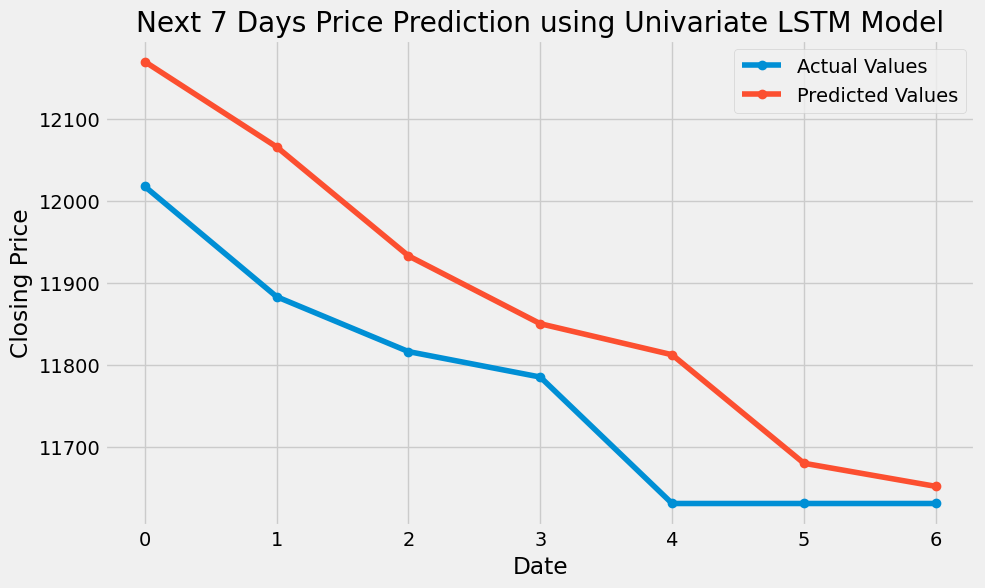

MAE: 109.78
MSE: 15752.82
RMSE: 125.51


In [59]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Extract predicted values corresponding to the test set
predicted_values = predictions[:7]  # Extract predictions for the first seven days

# Extract actual values corresponding to the test set
actual_values = y_test[:7]  # Extract actual values for the first seven days

# Plot a comparison graph between actual and predicted values
plt.figure(figsize=(10, 6))
plt.plot(actual_values, label='Actual Values', marker='o')
plt.plot(predicted_values, label='Predicted Values', marker='o')
plt.title('Next 7 Days Price Prediction using Univariate LSTM Model')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

# Calculate MAE, MSE, and RMSE
mae = mean_absolute_error(actual_values, predicted_values)
mse = mean_squared_error(actual_values, predicted_values)
rmse = np.sqrt(mse)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")


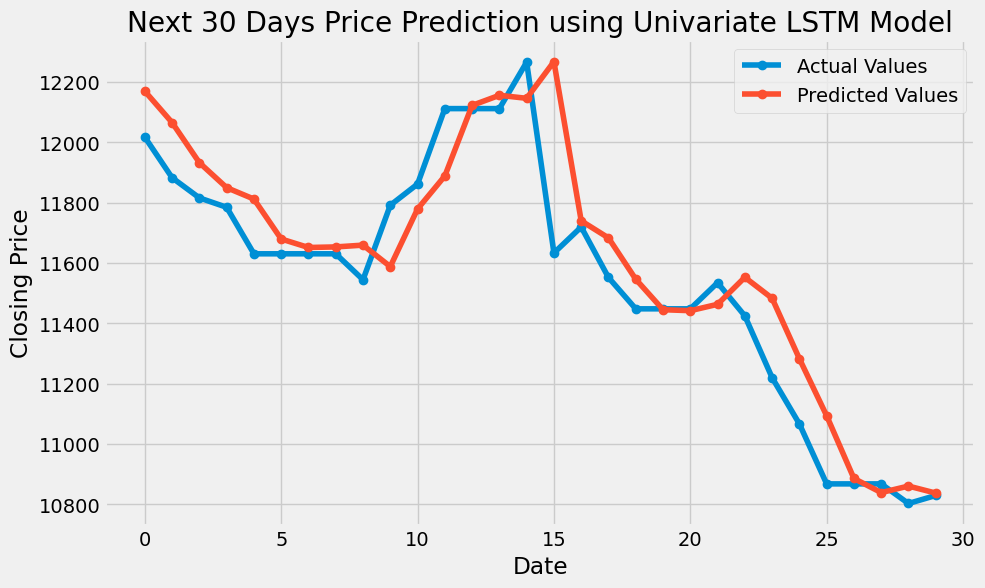

MAE: 116.68
MSE: 28710.34
RMSE: 169.44


In [60]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
# Extract predicted values corresponding to the test set
predicted_values = predictions[:30]  # Extract predictions for the first ten days

# Extract actual values corresponding to the test set
actual_values = y_test[:30]  # Extract actual values for the first ten days

# Plot a comparison graph between actual and predicted values
plt.figure(figsize=(10, 6))
plt.plot(actual_values, label='Actual Values', marker='o')
plt.plot(predicted_values, label='Predicted Values', marker='o')
plt.title('Next 30 Days Price Prediction using Univariate LSTM Model')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

# Calculate MAE, MSE, and RMSE
mae = mean_absolute_error(actual_values, predicted_values)
mse = mean_squared_error(actual_values, predicted_values)
rmse = np.sqrt(mse)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
